In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import pickle

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
#ProfileReport(df)

In [5]:
df['BMI'] = df['BMI'].replace(0 , df['BMI'].mean())

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())

In [8]:
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())

In [9]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())

In [10]:
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [11]:
#ProfileReport(df)

<AxesSubplot: >

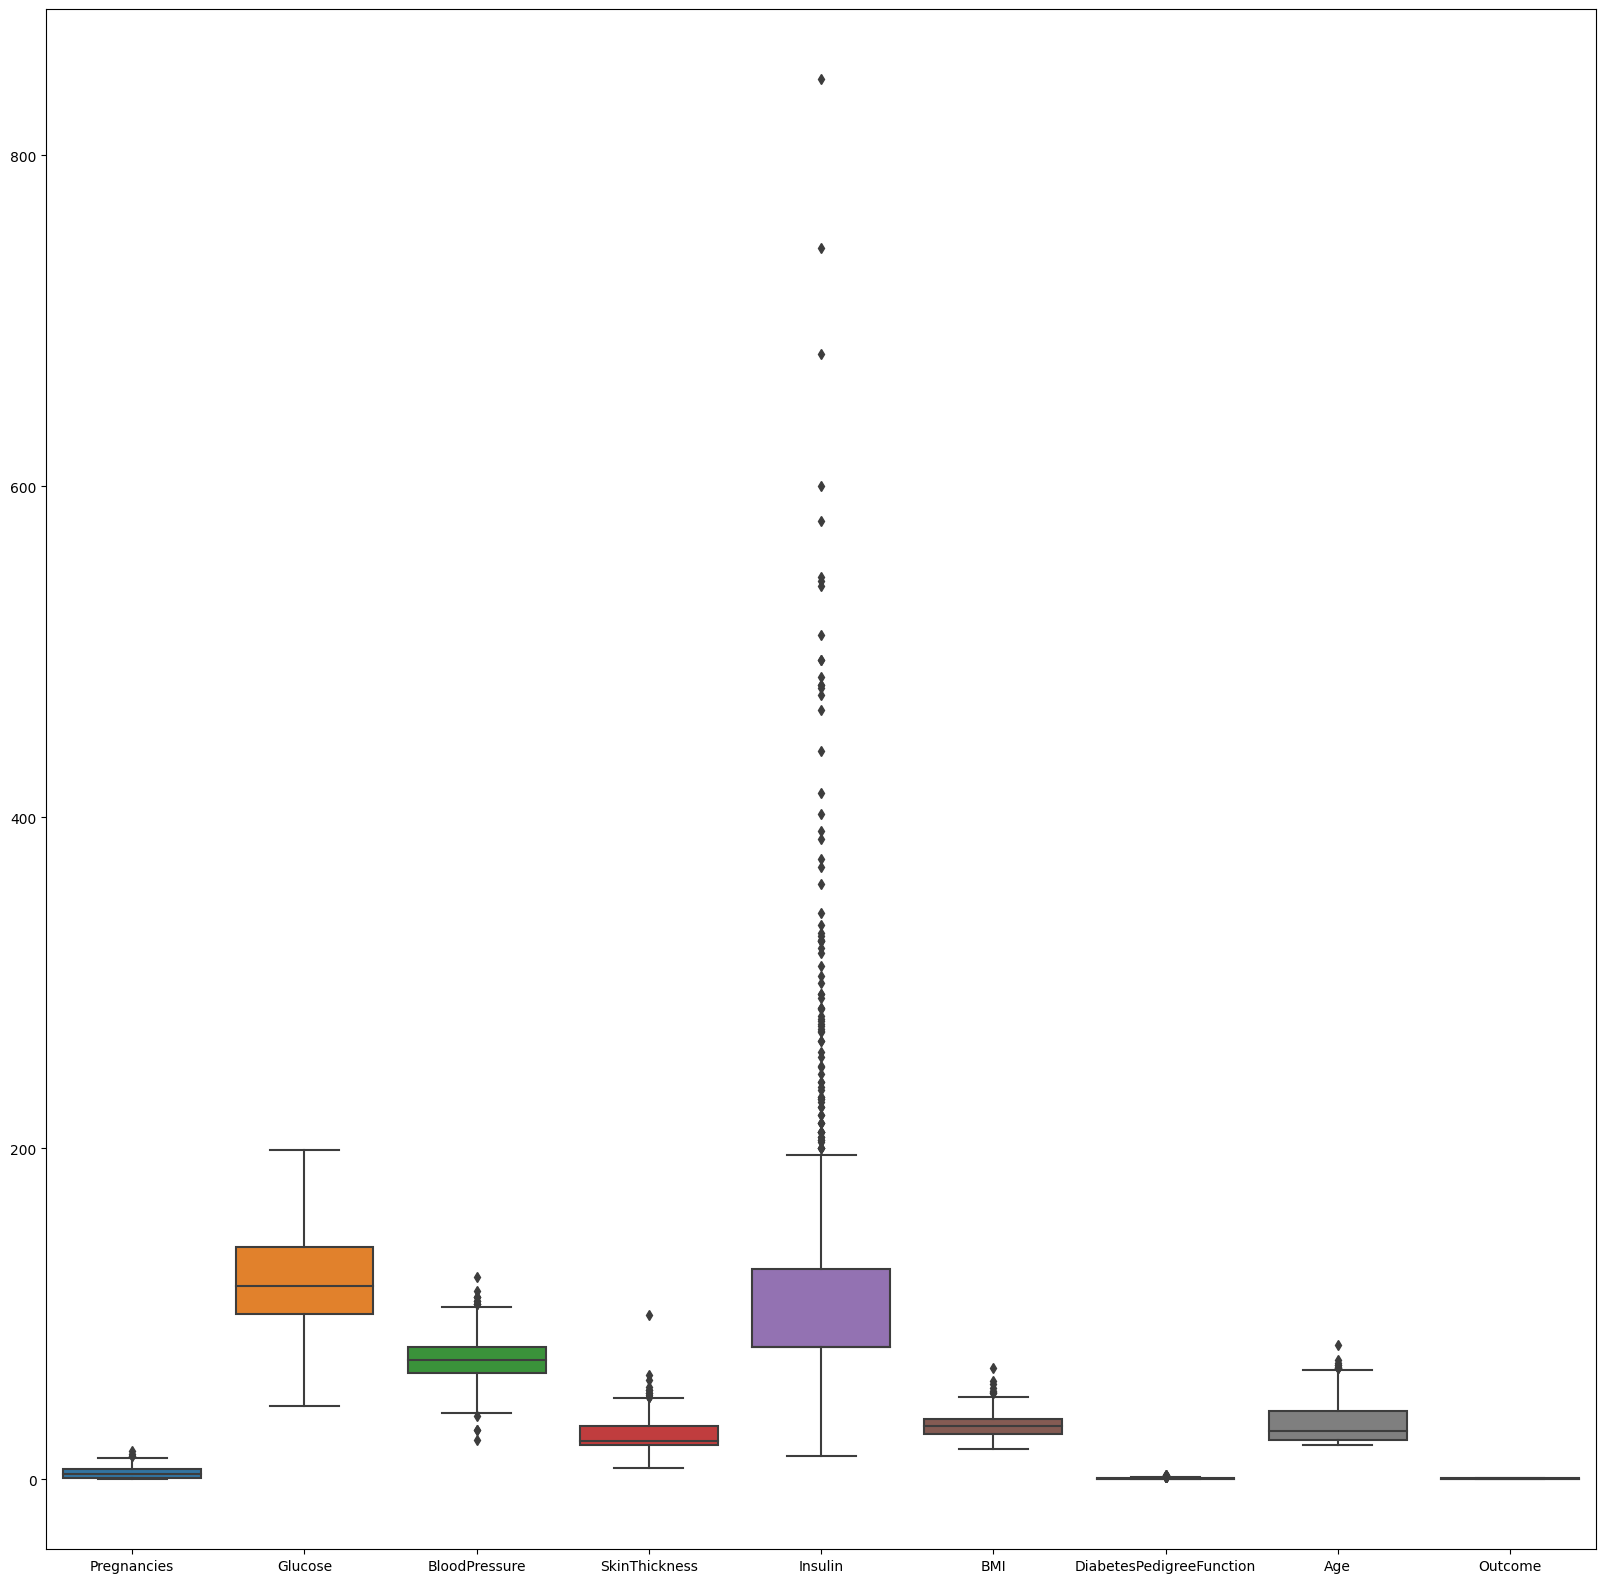

In [12]:
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df , ax = ax)

In [13]:
q = df['Insulin'].quantile(.70)
df_new = df[df['Insulin'] < q]

In [14]:
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.0,31.000000,79.799479,44.0,0.403,43,1
762,9,89.0,62.0,20.536458,79.799479,22.5,0.142,33,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


<AxesSubplot: >

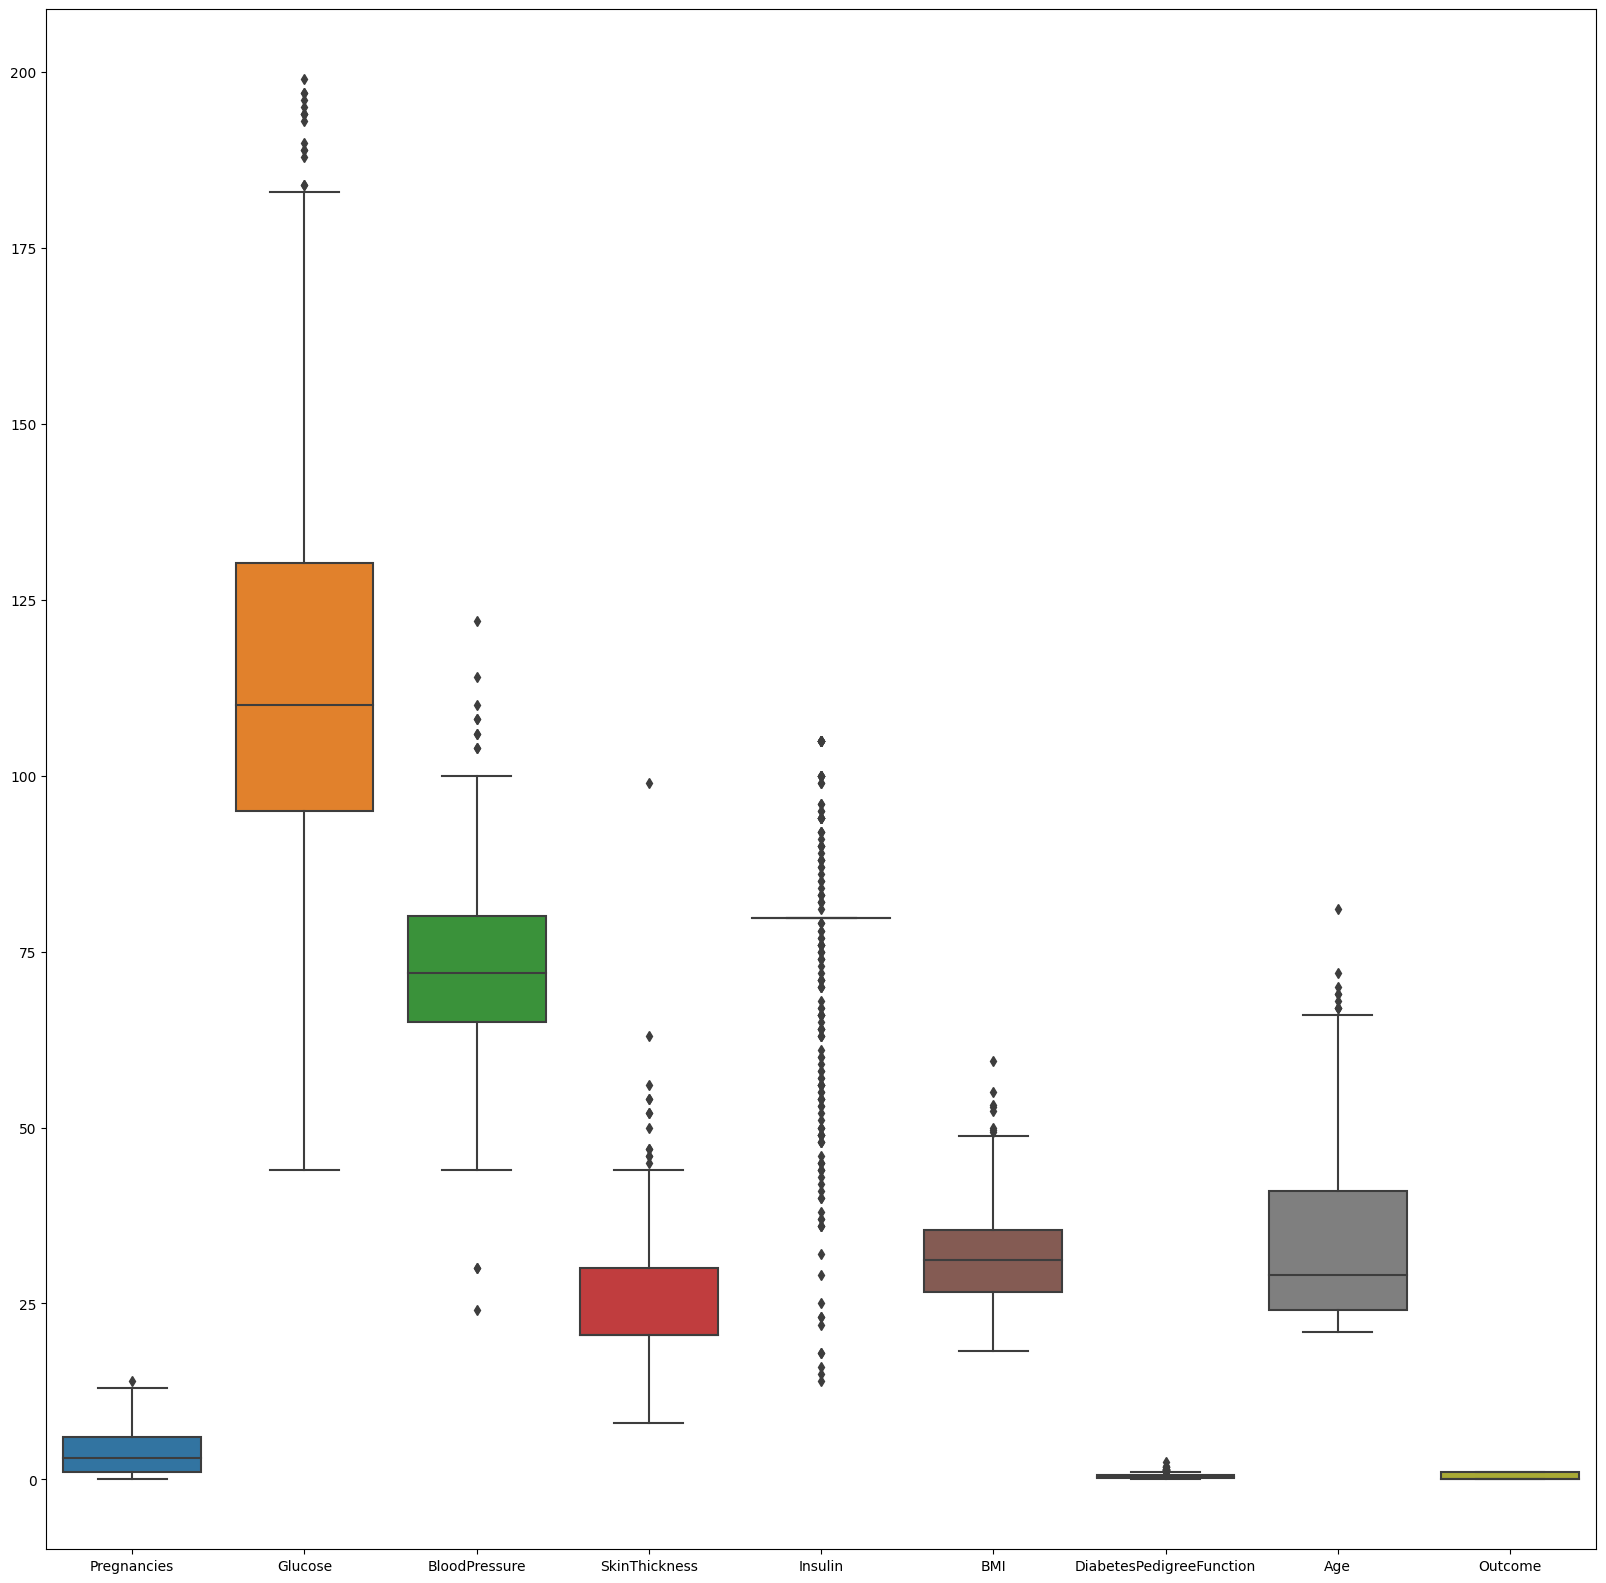

In [15]:
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new , ax = ax)

In [16]:
q = df['Pregnancies'].quantile(.98)
df_new = df[df['Pregnancies'] < q]

q = df_new['BMI'].quantile(.99)
df_new = df_new[df_new['BMI']< q]

q = df_new['SkinThickness'].quantile(.99)
df_new = df_new[df_new['SkinThickness']< q]

q = df_new['Insulin'].quantile(.95)
df_new = df_new[df_new['Insulin']< q]

q = df_new['DiabetesPedigreeFunction'].quantile(.99)
df_new = df_new[df_new['DiabetesPedigreeFunction']< q]


q = df_new['Age'].quantile(.99)
df_new = df_new[df_new['Age']< q]


In [17]:
def outlier_removal(self,data):
        def outlier_limits(col):
            Q3, Q1 = np.nanpercentile(col, [75,25])
            IQR= Q3-Q1
            UL= Q3+1.5*IQR
            LL= Q1-1.5*IQR
            return UL, LL

        for column in data.columns:
            if data[column].dtype != 'int64':
                UL, LL= outlier_limits(data[column])
                data[column]= np.where((data[column] > UL) | (data[column] < LL), np.nan, data[column])

        return data

In [18]:
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


<AxesSubplot: >

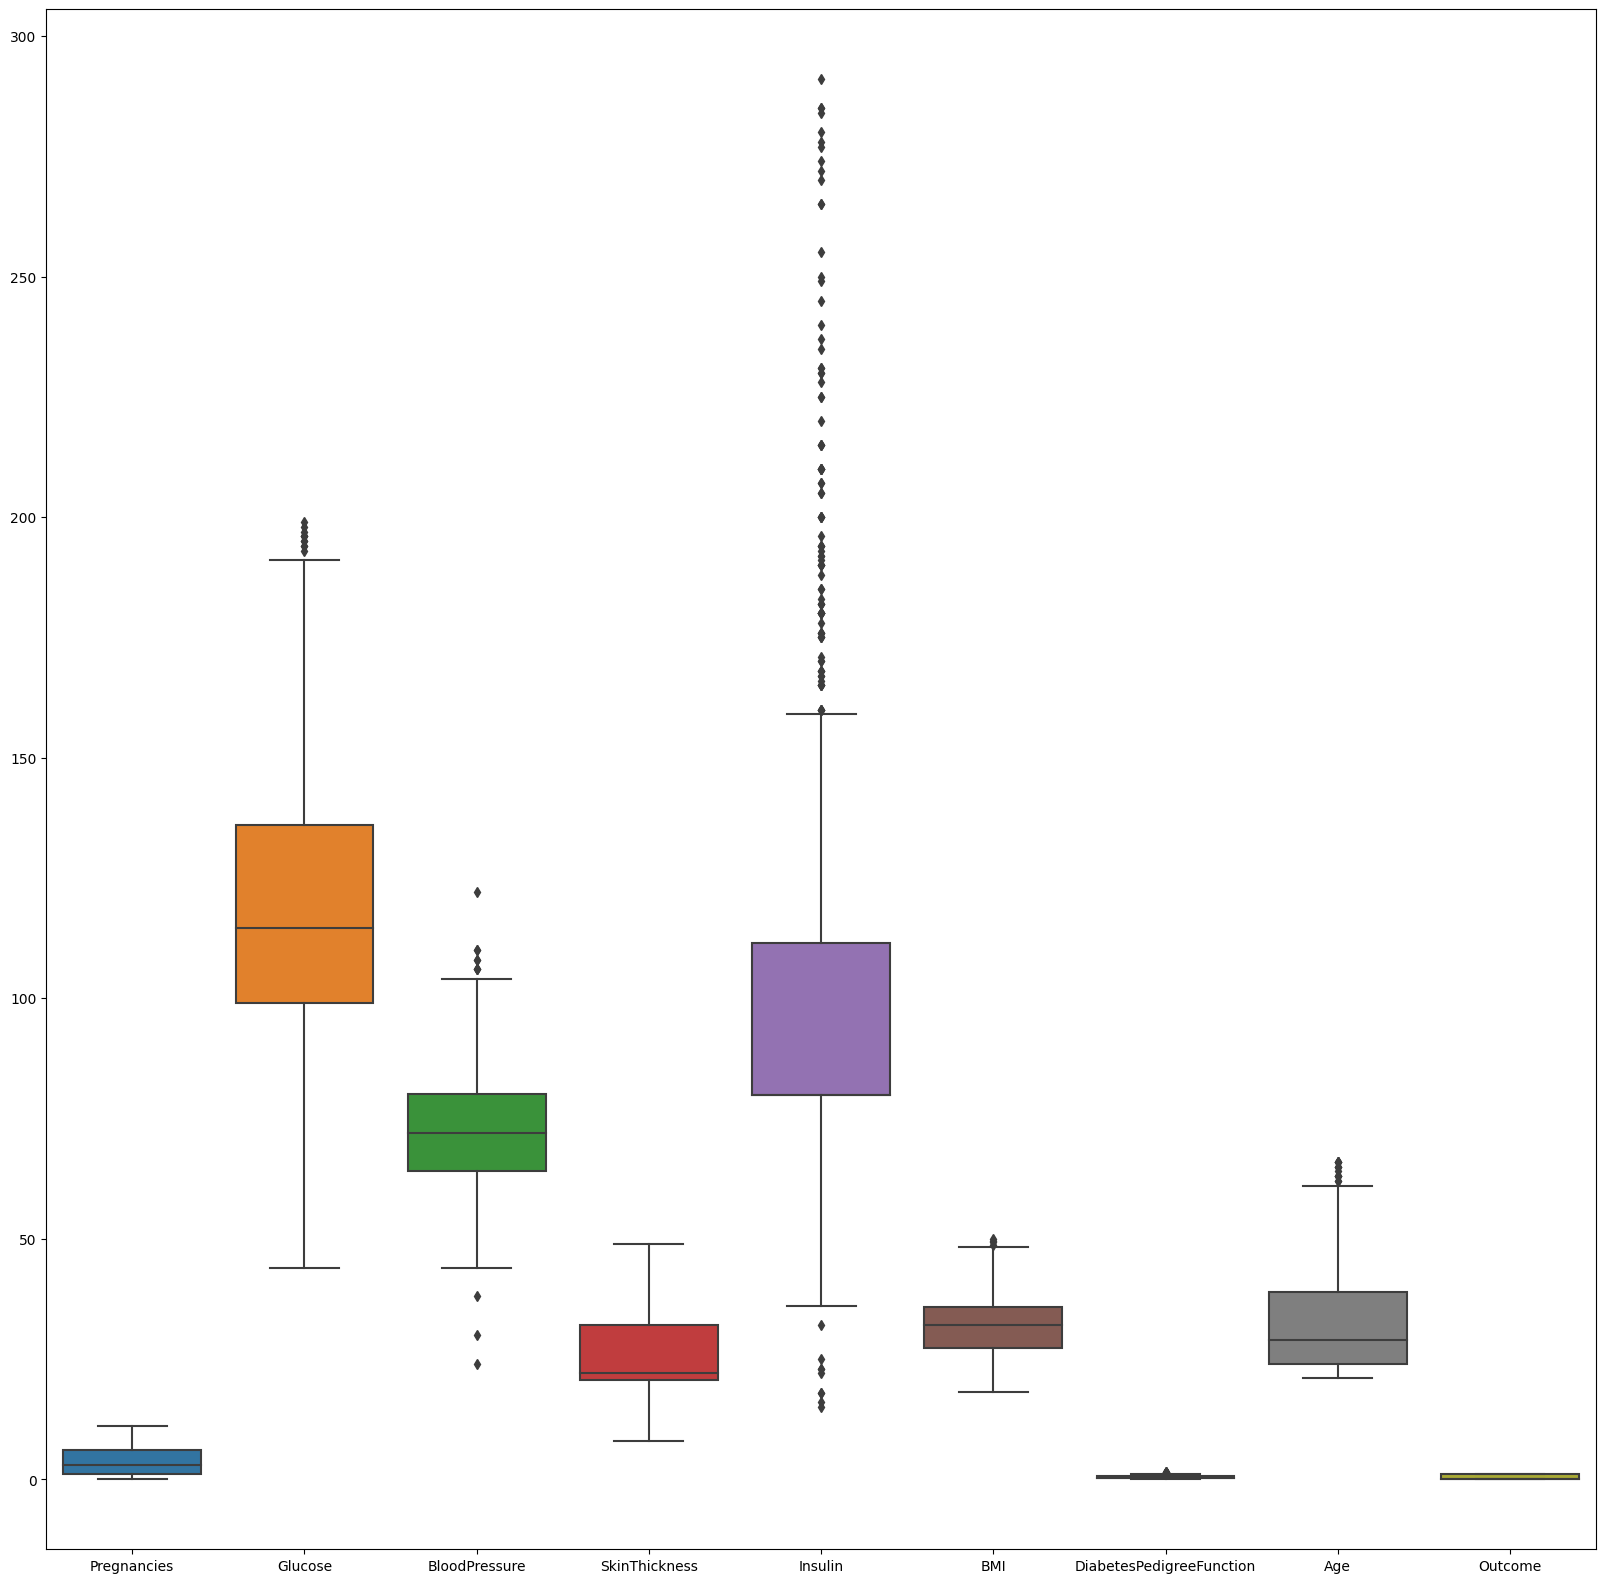

In [19]:
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new , ax = ax)

<AxesSubplot: >

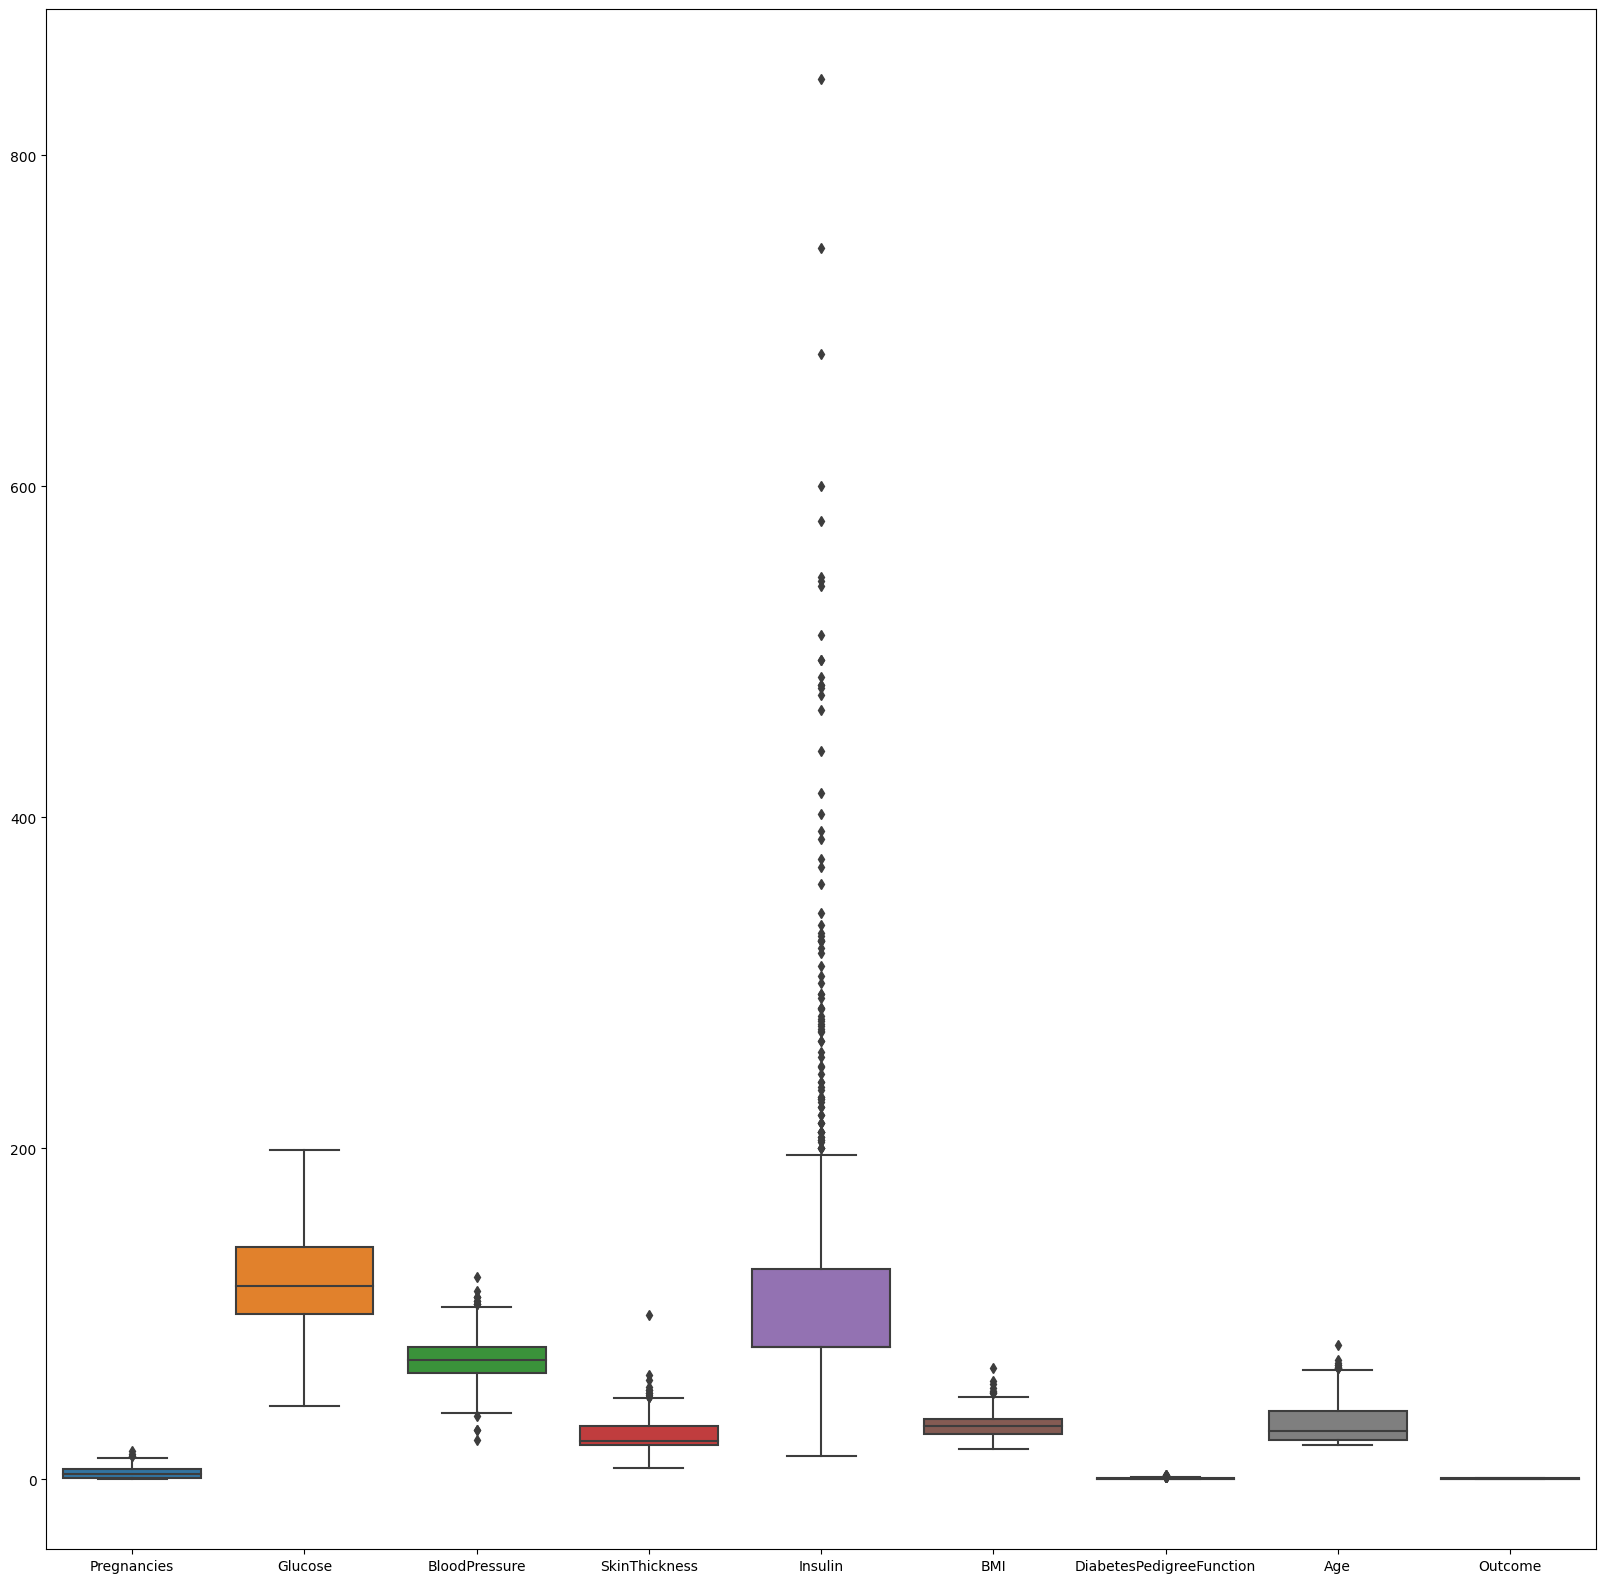

In [20]:
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df , ax = ax)

In [21]:
#ProfileReport(df_new)

In [22]:
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [23]:
y = df_new['Outcome']
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 674, dtype: int64

In [24]:
X = df_new.drop(columns=['Outcome'])

In [25]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [26]:
scalar = StandardScaler()
ProfileReport(pd.DataFrame(scalar.fit_transform(X)))
X_scaled = scalar.fit_transform(X)

<AxesSubplot: >

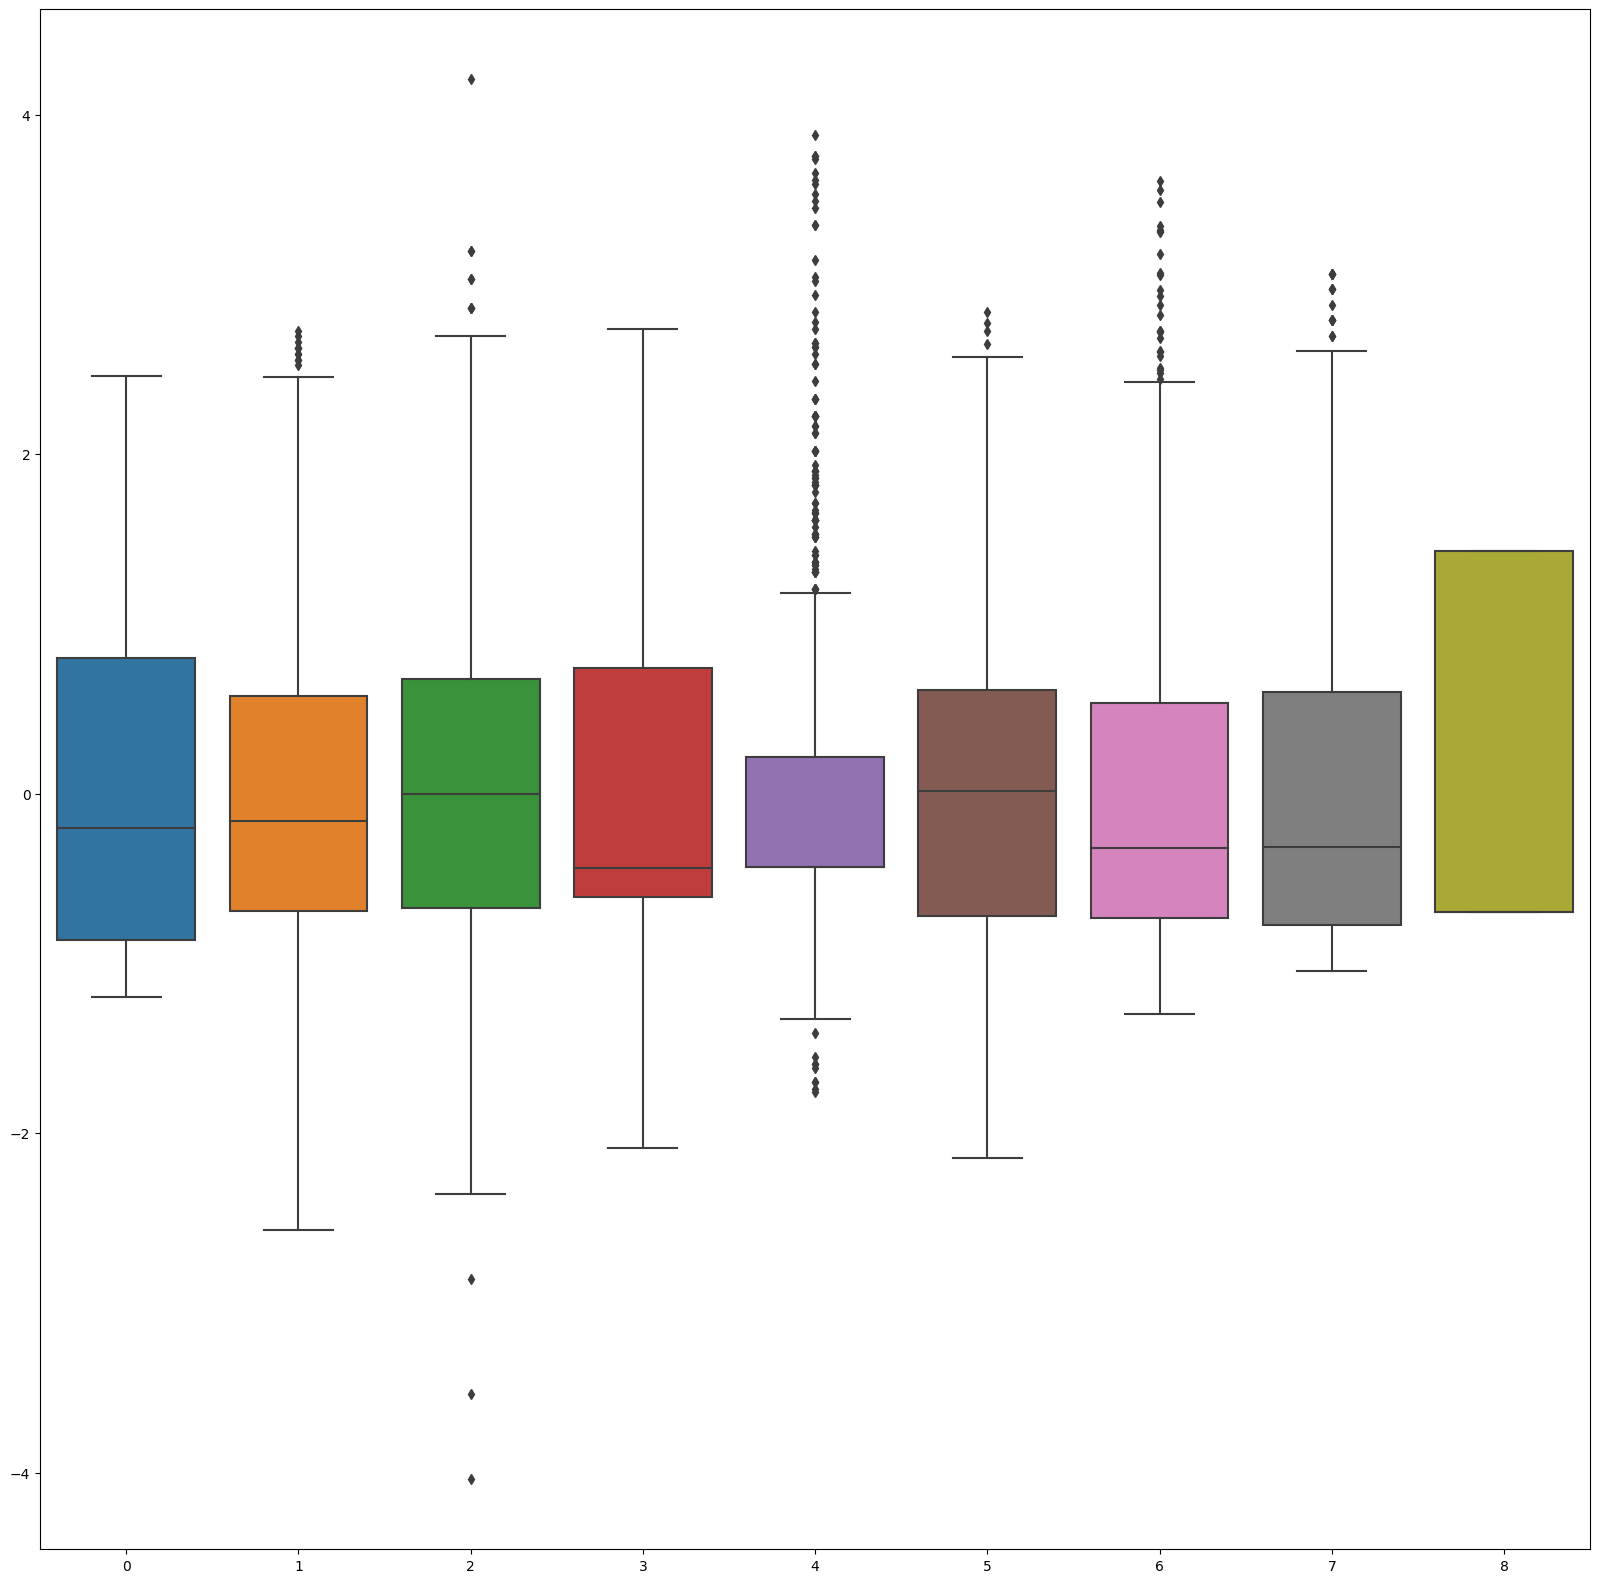

In [27]:
df_new_scalar = pd.DataFrame(scalar.fit_transform(df_new))
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new_scalar , ax = ax)

In [28]:
X_scaled

array([[ 7.96753910e-01,  9.83984062e-01,  4.52611463e-04, ...,
         2.65819648e-01,  6.30484542e-01,  1.60141519e+00],
       [-8.64793539e-01, -1.16977621e+00, -5.04474494e-01, ...,
        -8.31445036e-01, -3.38078670e-01, -1.32706484e-01],
       [ 1.46137289e+00,  2.18051755e+00, -6.72783529e-01, ...,
        -1.34872696e+00,  7.88402456e-01, -4.14369227e-02],
       ...,
       [ 4.64444420e-01,  6.09439465e-02,  4.52611463e-04, ...,
        -8.94145875e-01, -7.10063091e-01, -2.23976046e-01],
       [-8.64793539e-01,  2.31877301e-01, -1.00940160e+00, ...,
        -2.82812694e-01, -3.45097244e-01,  1.32760650e+00],
       [-8.64793539e-01, -8.96282840e-01, -1.67856424e-01, ...,
        -2.35787064e-01, -4.64413001e-01, -8.62862978e-01]])

In [29]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 674, dtype: int64

In [30]:
def vif_score(x):
    scaler = StandardScaler()
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=["FEATURE", "VIF_SCORE"])


In [31]:
vif_score(X)

,FEATURE,VIF_SCORE
0,Pregnancies,1.449056
1,Glucose,1.304263
2,BloodPressure,1.262686
3,SkinThickness,1.470049
4,Insulin,1.271017
5,BMI,1.513160
6,DiabetesPedigreeFunction,1.042300
7,Age,1.662728


In [32]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled , y , test_size = .20 , random_state = 144)

In [33]:
x_train

array([[-0.86479354,  0.19769063, -1.85094678, ...,  0.21879402,
         1.80609569, -0.40651517],
       [ 2.45830136,  1.22329076,  0.33707068, ...,  0.21879402,
         3.1782269 ,  1.69268475],
       [ 0.13213493,  0.91561072,  1.09446134, ..., -0.47091521,
        -0.90658316, -0.49778473],
       ...,
       [-0.86479354, -0.28092276,  1.17861586, ..., -0.28281269,
        -1.06801036, -0.86286298],
       [ 1.46137289,  0.02675728,  0.50537972, ..., -1.08224839,
        -0.13454002,  2.87918905],
       [-0.86479354, -0.75953616, -0.33616546, ..., -0.73739378,
         2.27283086, -0.95413254]])

In [34]:
x_test

array([[ 1.32134931e-01, -1.44176079e-01,  4.52611463e-04, ...,
        -4.70915211e-01, -2.50346495e-01,  1.23633694e+00],
       [-1.19710303e+00,  6.76304024e-01, -8.41092564e-01, ...,
        -1.53682948e+00, -8.43415997e-01, -1.04540210e+00],
       [ 2.45830136e+00,  8.13050708e-01,  1.85185200e+00, ...,
         7.36075942e-01, -6.78479508e-01,  1.69268475e+00],
       ...,
       [ 7.96753910e-01, -5.54416131e-01, -5.04474494e-01, ...,
        -1.19197486e+00, -6.96025943e-01, -3.15245608e-01],
       [-5.32484049e-01, -1.20396288e+00, -2.43135269e-01, ...,
         1.38528976e-02, -5.03015158e-01, -1.04540210e+00],
       [-8.64793539e-01, -1.64838960e+00, -2.01925581e+00, ...,
        -1.80330804e+00, -4.36338705e-01, -9.54132539e-01]])

In [35]:
x_test[0]

array([ 1.32134931e-01, -1.44176079e-01,  4.52611463e-04, -6.09921498e-01,
       -4.34192020e-01, -4.70915211e-01, -2.50346495e-01,  1.23633694e+00])

In [40]:
logr = LogisticRegression(verbose=1,solver='liblinear')

In [41]:
logr.fit(x_train,y_train )

[LibLinear]

LogisticRegression(solver='liblinear', verbose=1)

In [42]:
logr.predict_proba([x_test[1]])

array([[0.91450958, 0.08549042]])

In [43]:
logr.predict([x_test[1]])

array([0], dtype=int64)

In [44]:
logr.predict_log_proba([x_test[1]])

array([[-0.08936734, -2.45935091]])

In [45]:
type(y_test)

pandas.core.series.Series

In [46]:
y_test.iloc[1]

0

In [47]:
y_test

406    1
511    0
24     1
751    0
689    1
      ..
3      0
469    0
587    0
60     0
97     0
Name: Outcome, Length: 135, dtype: int64

In [48]:
logr = LogisticRegression(verbose=1)

In [49]:
logr.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=1)

In [52]:
logr_liblinear

LogisticRegression(solver='liblinear', verbose=1)

In [53]:
logr

LogisticRegression(verbose=1)

In [54]:
y_pred_liblinear = logr_liblinear.predict(x_test)
y_pred_liblinear

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0], dtype=int64)

In [55]:
y_pred_default = logr.predict(x_test)

In [56]:
y_pred_default

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0], dtype=int64)

In [57]:
confusion_matrix(y_test,y_pred_liblinear)

array([[77, 10],
       [24, 24]], dtype=int64)

In [58]:
confusion_matrix(y_test,y_pred_default)

array([[77, 10],
       [24, 24]], dtype=int64)

In [59]:
def model_eval(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    specificity=tn/(fp+tn)
    F1_Score = 2*(recall * precision) / (recall + precision)
    result={"Accuracy":accuracy,"Precision":precision,"Recall":recall,'Specficity':specificity,'F1':F1_Score}
    return result
model_eval(y_test,y_pred_liblinear)

{'Accuracy': 0.7481481481481481,
 'Precision': 0.7058823529411765,
 'Recall': 0.5,
 'Specficity': 0.8850574712643678,
 'F1': 0.5853658536585366}

In [60]:
model_eval(y_test,y_pred_default)

{'Accuracy': 0.7481481481481481,
 'Precision': 0.7058823529411765,
 'Recall': 0.5,
 'Specficity': 0.8850574712643678,
 'F1': 0.5853658536585366}

In [61]:
auc = roc_auc_score(y_test,y_pred_liblinear)

In [62]:
roc_auc_score(y_test,y_pred_default)

0.692528735632184

In [63]:
fpr, tpr, thresholds  = roc_curve(y_test,y_pred_liblinear)

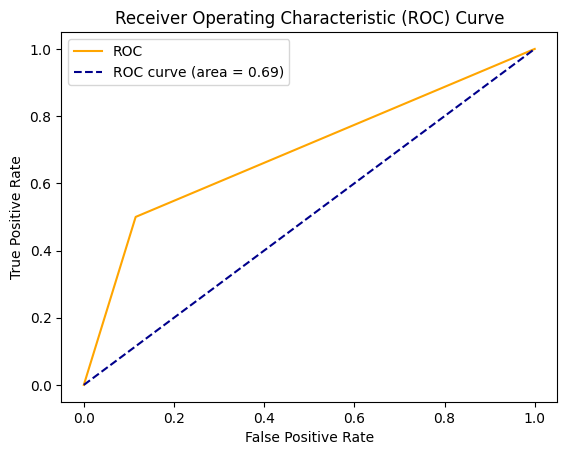

In [64]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
#logist regression task 

https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+%28AReM%29#
    
Task Logistic Regression
~~~~~~~~~~~~~~~~~~~~~~~~~~~
1. WAP to read folder name and make a label in the csv with folder name
2. Remove unneccesarry info in Automated way
3. No other algorithm must be used other than Logistic Regression
4. Try to utilize multiple solvers and make multiple models
5. Provide the best models
6. EDA and all must be done accordingly
Note: No manual approaches will be appreciated


## Iris dataset

In [65]:
import seaborn as sns 
import pandas as pd 
import numpy as np

In [66]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [67]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [68]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [69]:
df = df[df['species']!= 'setosa']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [70]:
df['species']=df['species'].map({'versicolor':0,'virginica':1})

In [71]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [72]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [74]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [79]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [80]:
classifier_regressor = GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [81]:
classifier_regressor.fit(X_train,y_train)

c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
330 fits failed out of a total of 495.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'no

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [83]:
classifier_regressor.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}

In [84]:
classifier_regressor.best_score_

0.9733333333333334

In [85]:
y_pred = classifier_regressor.predict(X_test)

In [86]:
from sklearn.metrics import accuracy_score,classification_report

In [87]:
score = accuracy_score(y_pred,y_test)
score

0.92

In [89]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.91      0.91      0.91        11

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



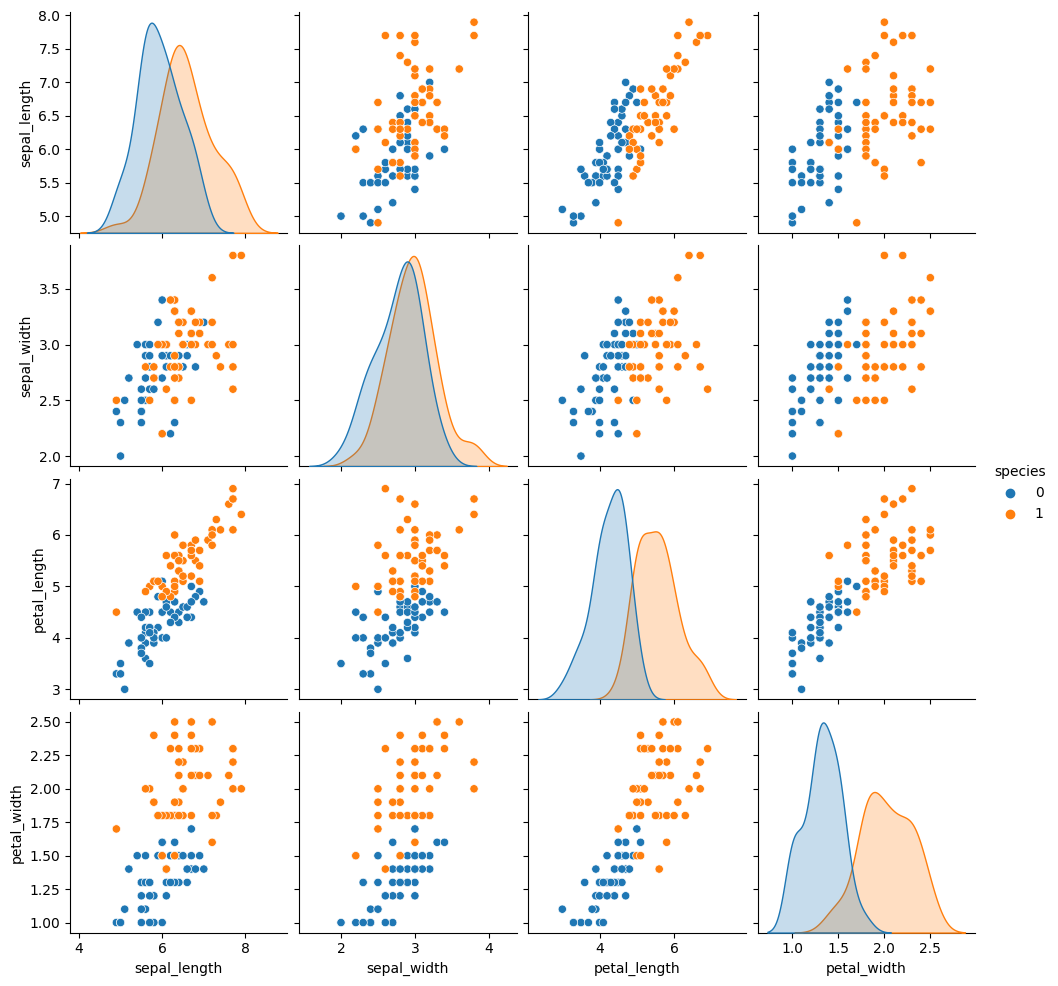

In [91]:
sns.pairplot(df,hue='species')

In [92]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,0.553855,0.828479,0.593709,0.494305
sepal_width,0.553855,1.000000,0.519802,0.566203,0.308080
petal_length,0.828479,0.519802,1.000000,0.823348,0.786424
petal_width,0.593709,0.566203,0.823348,1.000000,0.828129
species,0.494305,0.308080,0.786424,0.828129,1.000000
